<a href="https://colab.research.google.com/github/kOlfZz/kOlfZz/blob/main/Profissao_Cientista_de_Dados_M13_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [66]:
df = pd.read_csv("/content/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [68]:
#Seu código aqui para a média
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean()
media_por_categoria

,Preco_Normal
Categoria,
belleza-y-cuidado-personal,1783.556485
comidas-preparadas,3095.043478
congelados,2108.042553
frutas,1724.473684
instantaneos-y-sopas,765.491228
lacteos,2385.219239
verduras,1343.296875


In [69]:
#Seu código aqui para a mediana
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median()
mediana_por_categoria

,Preco_Normal
Categoria,
belleza-y-cuidado-personal,1569.0
comidas-preparadas,3290.0
congelados,1519.0
frutas,1195.0
instantaneos-y-sopas,439.0
lacteos,989.0
verduras,1180.0


Digite aqui as categorias:

- Média abaixo da Mediana
[comidas-preparadas, frutas]

- Média acima da Mediana
[belleza-y-cuidado-personal, congelados, instantaneos-y-sopas, lacteos, verduras]

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [70]:
# desvio padrão por categoria de produto
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std()
desvio_padrao_por_categoria

,Preco_Normal
Categoria,
belleza-y-cuidado-personal,2210.041719
comidas-preparadas,2019.911428
congelados,2111.539896
frutas,1639.151114
instantaneos-y-sopas,1170.232869
lacteos,3925.816164
verduras,1012.699625


A categoria lacteos tem um desvio padrão um pouco alto quando comparado com as outras categorias. Isso mostra que os dados estão bem dispersados em relação a média.

Quando analisamos a média e a mediana dessa categoria, percebemos que o valor da média (2385.22) é muito maior do que a da mediana (989.0). Provavelmente é uma categoria que apresenta alguns outliers que são responsáveis por elevar esse valor da média.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

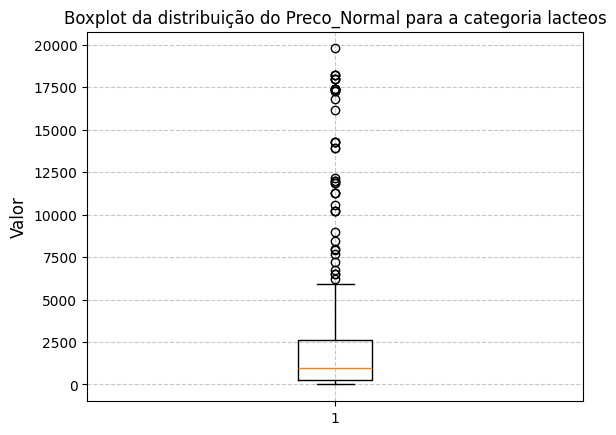

In [71]:
# boxplot do preço_normal para a categoria lacteos
plt.boxplot(df.loc[df['Categoria'] == 'lacteos']['Preco_Normal'])
plt.title('Boxplot da distribuição do Preco_Normal para a categoria lacteos')
plt.ylabel('Valor', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [72]:
# Filtra os dados da categoria 'lacteos'
df_lacteos = df[df['Categoria'] == 'lacteos']

# Cria o boxplot usando o Plotly Express
fig = px.box(df_lacteos, y="Preco_Normal", title="Boxplot da distribuição do Preco_Normal para a categoria lacteos")

# Personaliza o eixo y
fig.update_layout(
    yaxis_title="Valor",
    xaxis_title="Categoria - Lacteos",
    template="plotly_white"
)

# Exibe o gráfico
fig.show()


In [73]:
# Calcular Q1, Q3 e IQR
Q1 = df['Preco_Normal'].quantile(0.25)
Q3 = df['Preco_Normal'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior para os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar os outliers
outliers = df[(df['Preco_Normal'] < limite_inferior) | (df['Preco_Normal'] > limite_superior)]

# Exibir o número de outliers
print(f'Número de outliers: {outliers.shape[0]}')


Número de outliers: 53


Notamos que nossa suspeita por outliers é verdadeira. Esses valores estão elevando o valor da média, fazendo com que ela seja muito maior do que a mediana. Quando isso acontece, geralmente indica que a distribuição está deslocada para a direita, ou seja, ela tem uma assimetria à direita.

Isso acontece porque a média é sensível a valores extremos (outliers). Quando existem valores muito altos na distribuição, esses valores puxam a média para a direita, fazendo com que ela seja maior que a mediana.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

In [83]:
# media de descontos por categoria
media_desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().sort_values(ascending=False)
media_desconto_por_categoria

,Desconto
Categoria,
congelados,154.029787
belleza-y-cuidado-personal,123.083682
comidas-preparadas,43.478261
lacteos,17.411633
frutas,0.000000
instantaneos-y-sopas,0.000000
verduras,0.000000


In [85]:
# drop onde a media dos descontos == 0
media_desconto_por_categoria = media_desconto_por_categoria[media_desconto_por_categoria != 0]
media_desconto_por_categoria

,Desconto
Categoria,
congelados,154.029787
belleza-y-cuidado-personal,123.083682
comidas-preparadas,43.478261
lacteos,17.411633


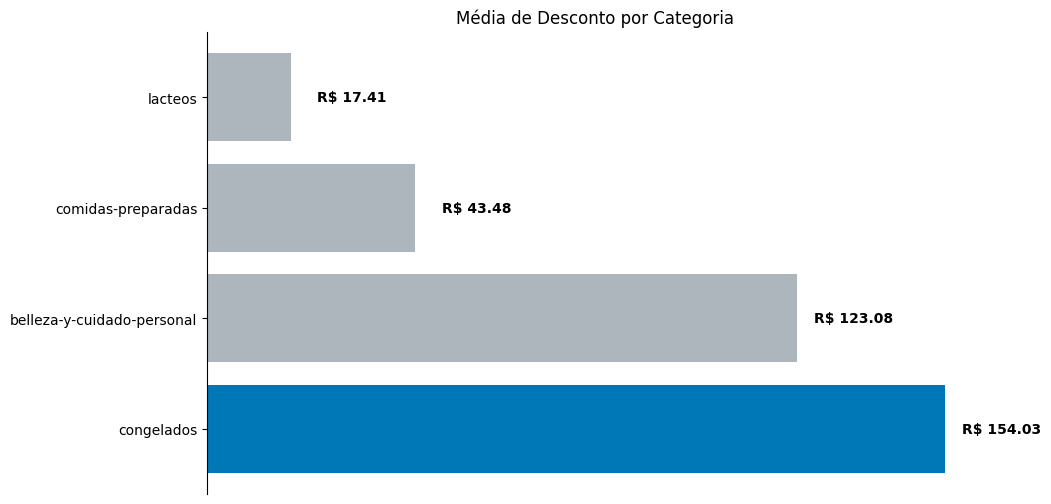

In [114]:
# Definindo as cores do gráfico
# Azul para o maior valor
cores = ['#0077b6' if i < 1 else  '#adb5bd' for i in range(len(media_desconto_por_categoria))]

# Criação do gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(media_desconto_por_categoria.index, media_desconto_por_categoria.values, color = cores)  # Usando .values para acessar os dados da Série

# Remover todas as bordas, exceto a borda do eixo Y
ax = plt.gca()
ax.spines['top'].set_visible(False)    # Remove a borda superior
ax.spines['right'].set_visible(False)  # Remove a borda direita
ax.spines['bottom'].set_visible(False) # Remove a borda inferior
# A borda do eixo Y (esquerda) permanece visível

# Remover o eixo X
plt.xticks([])


# Escrevendo os valores em cada barra
for i, valor in enumerate(media_desconto_por_categoria):
    qtd = f'R$ {valor:,.2f}'.replace(',', '.')  # Formatação do valor
    offset = 20 # Ajuste do offset (dependendo dos valores, pode ser necessário ajustar)
    ax.text(valor + offset, i, qtd, color='black', fontsize=10, fontweight='bold', ha='right', va='center')

# Título do gráfico
plt.title('Média de Desconto por Categoria')

# Exibir o gráfico
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [115]:
# agrupamento de um DataFrame por categoria e marca, e calculando a média de desconto
desconto_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# criando um gráfico de mapa interativo com os valores de descontos médios por categoria e marca
fig = px.treemap(desconto_por_categoria_marca,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Média de Desconto por Categoria e Marca', color='Marca')

# exibindo o gráfico
fig.show()